In [137]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/global-crocodile-species-dataset/crocodile_dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [138]:
data =pd.read_csv('/kaggle/input/global-crocodile-species-dataset/crocodile_dataset.csv')
data.head()

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...
2,3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough ana...
3,4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers,Least Concern,Edward Fuller,Officer relate animal direction eye bag do.
4,5,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers,Vulnerable,Donald Reid,Class great prove reduce raise author play mov...


In [139]:
#detection of null values in data and type types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Observation ID        1000 non-null   int64  
 1   Common Name           1000 non-null   object 
 2   Scientific Name       1000 non-null   object 
 3   Family                1000 non-null   object 
 4   Genus                 1000 non-null   object 
 5   Observed Length (m)   1000 non-null   float64
 6   Observed Weight (kg)  1000 non-null   float64
 7   Age Class             1000 non-null   object 
 8   Sex                   1000 non-null   object 
 9   Date of Observation   1000 non-null   object 
 10  Country/Region        1000 non-null   object 
 11  Habitat Type          1000 non-null   object 
 12  Conservation Status   1000 non-null   object 
 13  Observer Name         1000 non-null   object 
 14  Notes                 1000 non-null   object 
dtypes: float64(2), int64(1

In [140]:
#the information status of the specific type of data in the table
display(data.describe(include = "object"))

,Common Name,Scientific Name,Family,Genus,Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,18,18,1,3,4,3,936,47,29,5,989,1000
top,New Guinea Crocodile,Crocodylus novaeguineae,Crocodylidae,Crocodylus,Adult,Unknown,03-11-2010,Papua New Guinea,Rivers,Least Concern,David Smith,Cause bill scientist nation opportunity.
freq,68,68,1000,784,510,354,3,97,165,384,2,1


In [141]:
#the information status of the int64 & float64 type in table
display(data.describe(include = ["int64","float64"]))

,Observation ID,Observed Length (m),Observed Weight (kg)
count,1000.000000,1000.000000,1000.000000
mean,500.500000,2.415110,155.771900
std,288.819436,1.097542,175.186788
min,1.000000,0.140000,4.400000
25%,250.750000,1.637500,53.225000
50%,500.500000,2.430000,100.600000
75%,750.250000,3.010000,168.875000
max,1000.000000,6.120000,1139.700000


In [142]:
#time to drop unnecessary values in our table. Every column has to be increase our model.

#Observation Id is not necessary
#Family name found 1 all table so not meaningless
#Observer Date is not have any relationship with model
#Observer names most of them unique and nothing mean for model
#notes doesnt have any mean too.
#Family and Genus looks similar but Genus have 3 different unique value Family owns 1.

Y = data["Conservation Status"]   #this is what we want to predict. Take this from X's and remove it than.
data.drop(columns=["Observation ID","Family","Observer Name","Date of Observation","Notes","Conservation Status"])


,Common Name,Scientific Name,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Country/Region,Habitat Type
0,Morelet's Crocodile,Crocodylus moreletii,Crocodylus,1.90,62.0,Adult,Male,Belize,Swamps
1,American Crocodile,Crocodylus acutus,Crocodylus,4.09,334.5,Adult,Male,Venezuela,Mangroves
2,Orinoco Crocodile,Crocodylus intermedius,Crocodylus,1.08,118.2,Juvenile,Unknown,Venezuela,Flooded Savannas
3,Morelet's Crocodile,Crocodylus moreletii,Crocodylus,2.42,90.4,Adult,Male,Mexico,Rivers
4,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylus,3.75,269.4,Adult,Unknown,India,Rivers
...,...,...,...,...,...,...,...,...,...
995,West African Crocodile,Crocodylus suchus,Crocodylus,2.55,112.3,Adult,Female,Mauritania,Lakes
996,Hall's New Guinea Crocodile,Crocodylus halli,Crocodylus,2.27,80.3,Subadult,Female,Papua New Guinea,Freshwater Wetlands
997,West African Slender-snouted Crocodile,Mecistops cataphractus,Mecistops,2.34,93.5,Adult,Male,Côte d'Ivoire,Swamps
998,West African Slender-snouted Crocodile,Mecistops cataphractus,Mecistops,2.82,147.6,Adult,Male,Sierra Leone,Shaded Forest Rivers


In [143]:
Y.head()

0            Least Concern
1               Vulnerable
2    Critically Endangered
3            Least Concern
4               Vulnerable
Name: Conservation Status, dtype: object

In [144]:
#There is a categorical values. Time to make those numeric values using LabelEncoder() with single line of code
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data[data.select_dtypes(include=["object"]).columns] = data.select_dtypes(include=["object"]).apply(lambda x: le.fit_transform(x))


In [145]:
data.head()

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,1,7,5,0,0,1.90,62.0,0,1,917,1,27,3,19,141
1,2,0,0,0,0,4.09,334.5,0,1,813,45,16,4,109,28
2,3,11,2,0,0,1.08,118.2,2,2,212,45,6,0,656,219
3,4,7,5,0,0,2.42,90.4,0,1,22,29,22,3,287,568
4,5,8,8,0,0,3.75,269.4,0,2,435,17,22,4,269,161


In [146]:
#Y variable = "Conservation Status" and those values 
#are categorical classes → problem classification. Scikit requires these as numerical values, so we 
#labelEncode them.
Y = le.fit_transform(Y)


In [147]:
#Time to Scale data's (X)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data =sc.fit_transform(data)
#data type -> DataFrame
#y type -> numpy.ndarray

In [148]:
#Time to split values Train and Tests

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data,Y,test_size = 0.2,random_state =42)

**Logistic Regression**
Logistic regression adds a sigmoid function on top of linear regression, compressing the output into the range of 0 to 1. Thus, the predicted values can be interpreted directly as probabilities.

In [149]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(max_iter = 2000, multi_class = "multinomial")

In [150]:
lg.fit(x_train, y_train)
predict = lg.predict(x_test)

In [151]:
#Accuracy -> It gives the proportion of samples that the model predicted correctly.
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict)
print("Accuracy:", accuracy)

Accuracy: 1.0


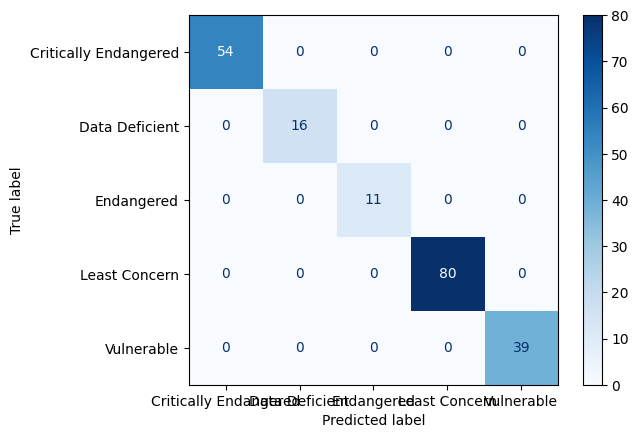

In [152]:
#Confusion Matrix -> Shows correct and incorrect predictions across classes.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')

In [153]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict, target_names=le.classes_))

                       precision    recall  f1-score   support

Critically Endangered       1.00      1.00      1.00        54
       Data Deficient       1.00      1.00      1.00        16
           Endangered       1.00      1.00      1.00        11
        Least Concern       1.00      1.00      1.00        80
           Vulnerable       1.00      1.00      1.00        39

             accuracy                           1.00       200
            macro avg       1.00      1.00      1.00       200
         weighted avg       1.00      1.00      1.00       200



**SVR Regression**

In [154]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

In [155]:
model = make_pipeline(SVR(kernel='rbf',C=1.0, epsilon=0.200))
model.fit(x_train, y_train)

Pipeline(steps=[('svr', SVR(epsilon=0.2))])

In [156]:
svr_pred = model.predict(x_test)

In [157]:
""""
Direct usage is not possible because svr continuously produces 
values and accuracy_Score expects continuously classified type data.

from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test, svr_pred)
print("Accuracy:", accuracy2)
"""""
print(x_train[0])


[-1.62986062  0.5060721  -1.23699193  0.         -0.49068632  2.09198171
  2.40337001 -0.91421831 -1.25834303 -0.99147339  1.68078365 -1.24450242
 -1.36494802 -0.35646581  0.38278342]


In [158]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [159]:
# 1. Performance Metrics
mae = mean_absolute_error(y_test, svr_pred)
mse = mean_squared_error(y_test, svr_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, svr_pred)
print("🔍 SVR Model Performance")
print("MAE (Mean Absolute Error ):", mae)
print("MSE (Mean Squared Error):", mse)
print("RMSE (Root Mean Squared Error):", rmse)
print("R² Score (R^2 Score):", r2)


🔍 SVR Model Performance
MAE (Mean Absolute Error ): 0.19290193574796136
MSE (Mean Squared Error): 0.059499410519056974
RMSE (Root Mean Squared Error): 0.24392501003188863
R² Score (R^2 Score): 0.9742549389818455


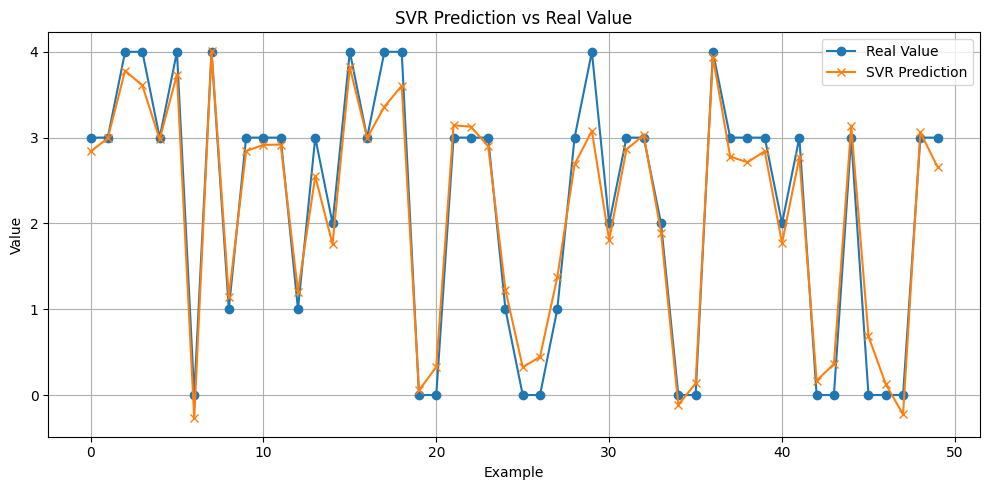

In [160]:
# 2. Visual Comparison (First 50 Example)
plt.figure(figsize=(10, 5))
plt.plot(y_test[:50], label='Real Value', marker='o')
plt.plot(svr_pred[:50], label='SVR Prediction', marker='x')
plt.title("SVR Prediction vs Real Value")
plt.xlabel("Example")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

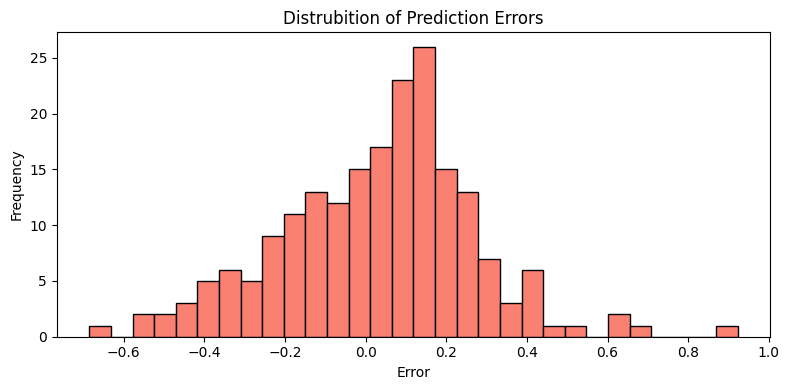

In [161]:
# 3. Hata Dağılımı
errors = y_test - svr_pred
plt.figure(figsize=(8, 4))
plt.hist(errors, bins=30, color='salmon', edgecolor='black')
plt.title("Distrubition of Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [162]:
from sklearn.model_selection import cross_val_score



# 5-fold cross-validation (R² skorlarını hesaplar)
scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')

print("Cross-Validation R² Score:", scores)
print("Mean R² Score:", np.mean(scores))


Cross-Validation R² Score: [0.97058385 0.9752199  0.97611038 0.97963364 0.97637846]
Mean R² Score: 0.9755852455790738


**Decision Tree**

In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [164]:
clf = DecisionTreeClassifier(criterion="gini", max_depth = 3 , random_state = 42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [165]:
decisionTPredict = clf.predict(x_test)

In [166]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
print("Accuracy:", metrics.accuracy_score(y_test,decisionTPredict))

Accuracy: 0.945


In [167]:
#macro : It takes the precision of each class with equal weight (does not take class imbalance into account).
#micro : It is calculated based on the total correct predictions of all classes (a more general measure of success).
#weight: It weights the precision of each class according to the number of examples (ideal for imbalanced data).
print("Precision macro:", precision_score(y_test, decisionTPredict, average="macro",zero_division=0))
print("Precision micro:", precision_score(y_test, decisionTPredict, average="micro",zero_division=0))
print("Precision weighted:", precision_score(y_test, decisionTPredict, average="weighted",zero_division=0))


Precision macro: 0.7185185185185186
Precision micro: 0.945
Precision weighted: 0.9124074074074073


In [168]:
from sklearn.metrics import recall_score
print("Recall (macro):", recall_score(y_test, decisionTPredict, average='macro'))
print("Recall (micro):", recall_score(y_test, decisionTPredict, average='micro'))
print("Recall (weighted):", recall_score(y_test, decisionTPredict, average='weighted'))


Recall (macro): 0.8
Recall (micro): 0.945
Recall (weighted): 0.945


In [169]:
from sklearn.metrics import f1_score
print("F1 Score (macro):", f1_score(y_test, decisionTPredict, average='macro'))
print("F1 Score (micro):", f1_score(y_test, decisionTPredict, average='micro'))
print("F1 Score (weighted):", f1_score(y_test, decisionTPredict, average='weighted'))


F1 Score (macro): 0.7488372093023256
F1 Score (micro): 0.945
F1 Score (weighted): 0.9245348837209302


Confusion Matrix:
 [[54  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  0 80  0]
 [ 0  0  0  0 39]]


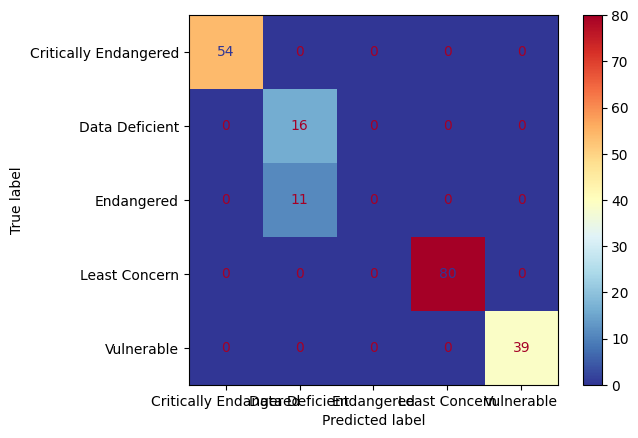

In [170]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, decisionTPredict))
cmDecisionTree = confusion_matrix(y_test, decisionTPredict)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cmDecisionTree, display_labels=le.classes_)
disp2.plot(cmap='RdYlBu_r')

In [171]:
from sklearn.metrics import classification_report

print(classification_report(y_test, decisionTPredict, target_names=le.classes_,zero_division=0))

                       precision    recall  f1-score   support

Critically Endangered       1.00      1.00      1.00        54
       Data Deficient       0.59      1.00      0.74        16
           Endangered       0.00      0.00      0.00        11
        Least Concern       1.00      1.00      1.00        80
           Vulnerable       1.00      1.00      1.00        39

             accuracy                           0.94       200
            macro avg       0.72      0.80      0.75       200
         weighted avg       0.91      0.94      0.92       200



**RandomForest Classifier**

In [172]:
from sklearn.metrics import roc_auc_score
# Get probability. clf -> model of DecisionTree
decisionTProba = clf.predict_proba(x_test)
print("ROC AUC (ovr):", roc_auc_score(y_test, decisionTProba, multi_class='ovr'))


ROC AUC (ovr): 0.9855561306648262


In [173]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(max_depth=2, random_state = 0)
rfc.fit(x_train,y_train)
rfcPredict = rfc.predict(x_test)

In [174]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, rfcPredict)
print(accuracy)


0.905


In [175]:
from sklearn.metrics import precision_score
precisionMicro = precision_score(y_test, rfcPredict, average='micro',zero_division=0)  # multiclass için 'macro', 'weighted'
precisionMacro = precision_score(y_test, rfcPredict, average='macro',zero_division=0)  # multiclass için 'macro', 'weighted'
precisionWeighted= precision_score(y_test, rfcPredict, average='weighted',zero_division=0)  # multiclass için 'macro', 'weighted'

"""
zero_division=0: Returns 0 for classes where precision cannot be calculated. 
zero_division=1: Returns 1 for classes where precision cannot be calculated.
"""

print("Precision Score (micro)",precisionMicro)
print("Precision Score (macro)",precisionMacro)
print("Precision Score (weighted)",precisionWeighted)

Precision Score (micro) 0.905
Precision Score (macro) 0.7003367003367004
Precision Score (weighted) 0.8760437710437711


In [176]:
from sklearn.metrics import recall_score
recallMicro = recall_score(y_test, rfcPredict, average='micro')
recallMacro = recall_score(y_test, rfcPredict, average='macro')
recallWeighted = recall_score(y_test, rfcPredict, average='weighted')
print("recall micro:", recallMicro)
print("recall macro:", recallMacro)
print("recall weighted:", recallWeighted)


recall micro: 0.905
recall macro: 0.7589743589743589
recall weighted: 0.905


In [177]:
from sklearn.metrics import f1_score

f1Micro = f1_score(y_test, rfcPredict, average='micro')
f1Macro = f1_score(y_test, rfcPredict, average='macro')
f1Weighted = f1_score(y_test, rfcPredict, average='weighted')
print("recall micro:", f1Micro)
print("recall macro:", f1Macro)
print("recall weighted:", f1Weighted)


recall micro: 0.905
recall macro: 0.7164562569213732
recall weighted: 0.8832015503875968


Confusion Matrix:
 [[54  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  0 80  0]
 [ 0  0  0  8 31]]


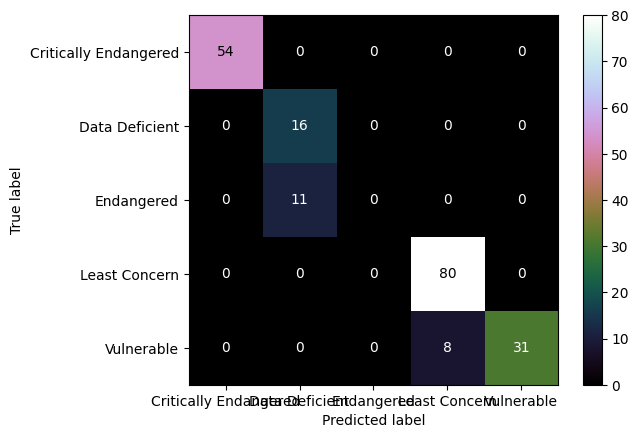

In [178]:
from sklearn.metrics import confusion_matrix
cmRFC = confusion_matrix(y_test, rfcPredict)
print("Confusion Matrix:\n", cmRFC)
disp = ConfusionMatrixDisplay(confusion_matrix=cmRFC, display_labels=le.classes_)
disp.plot(cmap='cubehelix')

In [179]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rfcPredict, target_names=le.classes_,zero_division=0))

                       precision    recall  f1-score   support

Critically Endangered       1.00      1.00      1.00        54
       Data Deficient       0.59      1.00      0.74        16
           Endangered       0.00      0.00      0.00        11
        Least Concern       0.91      1.00      0.95        80
           Vulnerable       1.00      0.79      0.89        39

             accuracy                           0.91       200
            macro avg       0.70      0.76      0.72       200
         weighted avg       0.88      0.91      0.88       200

